In [193]:
#import all the packages

from sklearn.datasets import make_blobs
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [194]:
#Creation of synthetic data using make blobs
#Parameter - set number of samples = 200, features(dimensions) = 4, number of classes = 2, number of clusters = 2
samps = 200
feats = 4
from sklearn.datasets import make_blobs
Input_data = make_blobs(n_samples=samps, n_features=feats, centers=2, cluster_std=1.1, 
                   center_box=(-5.0, 5.0), shuffle=False, random_state=1)

In [195]:
#Store the input data and the associated labels to a variable
X = Input_data[0]
Y = Input_data[1]

In [196]:
X.shape, Y.shape

((200, 4), (200,))

In [197]:
#Create a pandas data frame for the input data 
X_df = pd.DataFrame(X, columns=['dim'+ str(i) for i in range(1,feats+1)])
X_df['y'] = Y

In [198]:
X_df

,dim1,dim2,dim3,dim4,y
0,0.122168,-0.328448,-3.079563,-2.814002,0
1,-0.478837,1.928938,-3.390538,-4.242829,0
2,-1.184439,1.780785,-3.751710,-3.186555,0
3,-1.019451,1.237601,-4.952421,-1.335578,0
4,-2.040461,3.462441,-4.007106,-1.423931,0
...,...,...,...,...,...
195,-2.192706,-6.211363,-4.024194,-1.490425,1
196,-4.188136,-3.128829,-5.432428,-1.146411,1
197,-3.063929,-4.022626,-1.924937,-2.896924,1
198,-2.312963,-4.849826,-2.339292,-1.901017,1


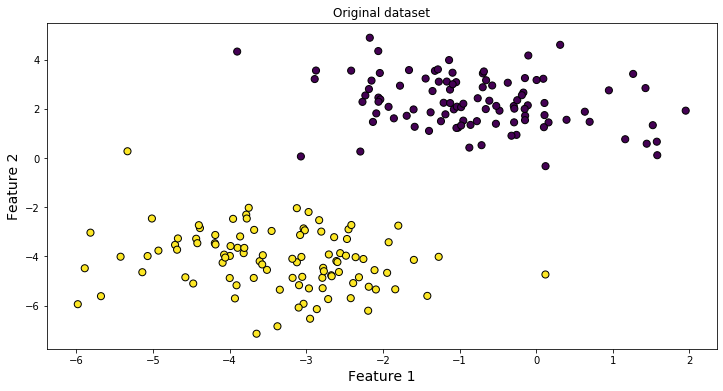

In [199]:
#Plot of the input data 
plt.figure(figsize=(12,6))   #initialise the size of the fig
#Plot the first two dimensions

plt.scatter(X_df['dim1'], X_df['dim2'], s=50, c=X_df['y'], edgecolors='black')

plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.title("Original dataset")
plt.show()

In [200]:
from sklearn.ensemble import RandomForestClassifier

In [201]:
#Function to create a proximity matrix
#I/p params : The model we're using of RF, the input data that the model is being applied to 

#That is, for all pairs of samples in your dataset, 
#iterate over the decision trees in the forest and count the number of times they fall in the same leaf 
#i.e., the number of times 'apply' gives the same node id for both samples in the pair.

#LINK FOR GENERATING THE PROXIMITY MATRIX:-
#https://stackoverflow.com/questions/18703136/proximity-matrix-in-sklearn-ensemble-randomforestclassifier

def proximityMatrix(model, X, normalize=True):      

    terminals = model.apply(X)
    nTrees = terminals.shape[1]

    a = terminals[:,0]
    proxMat = 1*np.equal.outer(a, a)

    for i in range(1, nTrees):
        a = terminals[:,i]
        proxMat += 1*np.equal.outer(a, a)

    if normalize:
        proxMat = proxMat / nTrees

    return proxMat   


In [202]:
#Define a random forest classfier model

model = RandomForestClassifier(n_estimators=100, random_state=1, max_features = 'sqrt')
model.fit(X, Y)
#Calling the proximity matrix function to obtain the proximity matrix from the RF model.

prox_mat = proximityMatrix(model, X, normalize=True)

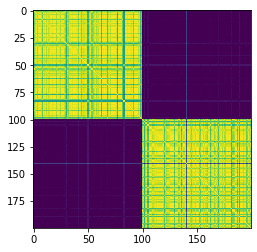

In [203]:
#Display the proximity matrix 
plt.imshow(prox_mat)

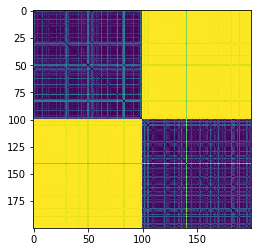

In [204]:
plt.imshow(1-prox_mat)

In [205]:
#Performing clustering on the output of the RF to check its efficiency

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

cluster = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
predict_labels = cluster.fit_predict(prox_mat) 
score = adjusted_rand_score(Y, predict_labels)

print("labels\n", Y) #True labels
print("predict\n", predict_labels) #Labels that were predicted
print("Adjusted Rand Score:", score) #Adjusted rand score to check how well the clusters are identified.

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
predict
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Adjusted Rand Score: 0.9799995050507551


In [206]:
#Clustering for non-euclidean 
clust1 = AgglomerativeClustering(n_clusters=2, affinity="precomputed", linkage="single")
clust2 = AgglomerativeClustering(n_clusters=2, affinity="precomputed", linkage="complete")
clust3 = AgglomerativeClustering(n_clusters=2, affinity="precomputed", linkage="average")

pred_labels1 = clust1.fit_predict(1-prox_mat) 
pred_labels2 = clust2.fit_predict(1-prox_mat) 
pred_labels3 = clust3.fit_predict(1-prox_mat)

score_1 = adjusted_rand_score(Y, pred_labels1)
score_2 = adjusted_rand_score(Y, pred_labels2)
score_3 = adjusted_rand_score(Y, pred_labels3)


print("Adjusted Rand Score:", score_1, score_2, score_3) #Adjusted rand score to check how well the clusters are identified.

Adjusted Rand Score: 0.9799995050507551 0.9799995050507551 1.0


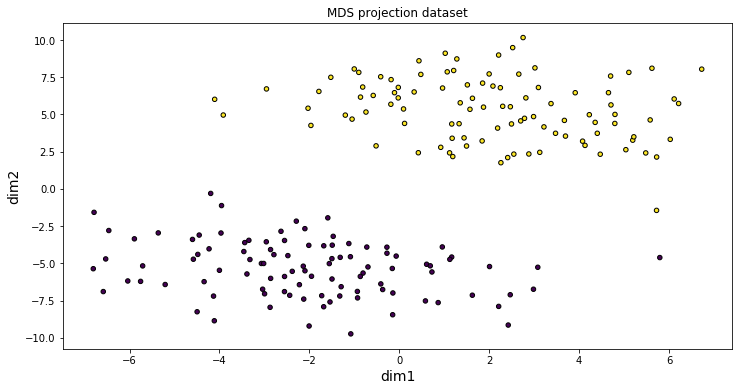

In [207]:
from sklearn.manifold import MDS

#Reduce the number of components directly from the input dataset using MDS
#This will, with the use of most significant Eigen vectors(in the case of metric MDS) keep the dimensions that gives most amount of information
model_mds1 = MDS(n_components=2, metric = True) #, dissimilarity='precomputed', random_state=1)

out = model_mds1.fit_transform(X) #input data is given directly here 

out *= np.sqrt((X ** 2).sum()) / np.sqrt((out ** 2).sum())

plt.figure(figsize=(12,6))
plt.scatter(out[:, 0], out[:, 1],s = 20, c=X_df['y'], edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)

plt.title("MDS projection dataset")
plt.show()


In [208]:
#Perform agglomerative clustering to check the efficiency of MDS's dimensionality reduction: We went from 4 -> 2 dims
#check if the clusters are identified using the agglomerative clustering 
clust_mds= AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
pred_mds = clust_mds.fit_predict(out)
score_mds = adjusted_rand_score(Y, pred_mds)

print("True Labels \n", Y)
print("Predicted labels \n", pred_mds)
print("Adjusted rand score \n", score_mds)

True Labels 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted labels 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Adjusted rand score 
 0.9799995050507551


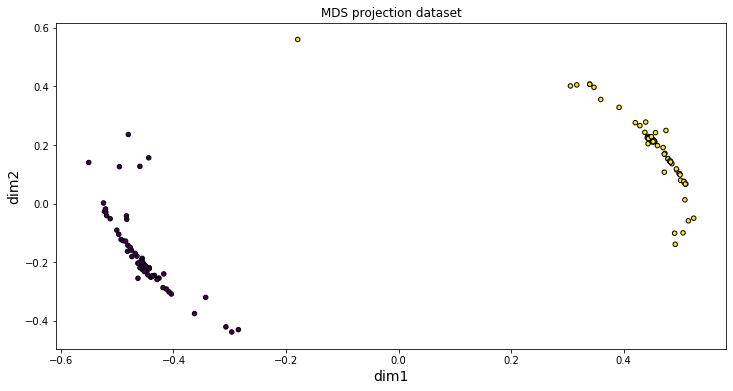

In [209]:
#Perform MDS on the RF's proximity matrix -> dissimilarity matrix = 1 - proximity matrix
#Reducing the number of dimensions to 2
#This is for metric MDS 
model_mds2 = MDS(n_components=2, metric = True, dissimilarity='precomputed', random_state=1)

embed = model_mds2.fit_transform(1-prox_mat)

plt.figure(figsize=(12,6))
plt.scatter(embed[:, 0], embed[:, 1],s = 20, c=X_df['y'], edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)

plt.title("MDS projection dataset")
plt.show()

In [210]:
#Perform clusterning on this output to check ARI

#If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

clust_rf = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
predict_rf = clust_rf.fit_predict(embed)
score_rf = adjusted_rand_score(Y, predict_rf)

print("labels\n", Y)
print("predict\n", predict_rf)
print("Adjusted Rand Score:", score_rf)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
predict
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Adjusted Rand Score: 0.9799995050507551


In [ ]:
#Since fit.tranform of the returns the embedded coordinates
#Should we compute a distance matrix before trying to cluster the data?
#If so, what kind of distance matrix should be construced for this?

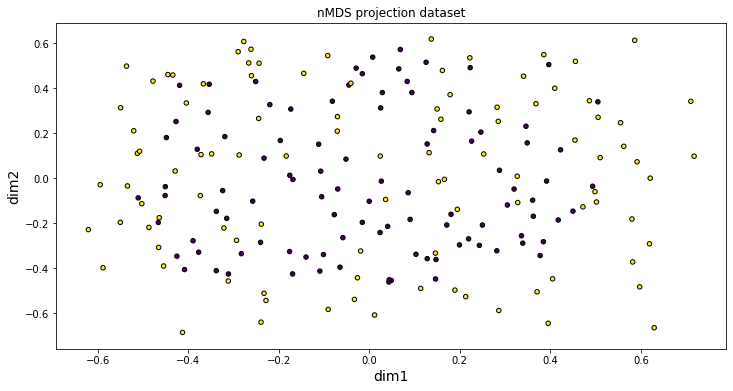

In [211]:
#Trying out non-metric MDS
#We get this by setting the parmeter metric = False, this ensures that the algo consider it to be non-metric computation
#Here, trying to reduce the dimensions to 2 from 4 
nmds_model = MDS(n_components=2, metric = False, dissimilarity='precomputed', random_state=1)

embed_nmds = nmds_model.fit_transform(1-prox_mat)
plt.figure(figsize=(12,6)) 

plt.scatter(embed_nmds[:, 0], embed_nmds[:, 1], s = 20, c = X_df['y'], edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)

plt.title("nMDS projection dataset")
plt.show()

In [213]:
clust_nm = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
pred_nmds = clust_nm.fit_predict(embed_nmds)
score_nmds = adjusted_rand_score(Y, pred_nmds)

print("labels\n", Y)
print("predict\n", pred_nmds)
print("Adjusted Rand Score:", score_nmds)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
predict
 [0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1
 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1
 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0
 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0
 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0]
Adjusted Rand Score: -0.0013028618522049886


In [214]:
from sklearn.datasets import make_blobs
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import pandas as pd 
import numpy as np

from rerf.urerf import UnsupervisedRandomForest
from sklearn.manifold import MDS

In [215]:
#Define the USPORF model
clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)

In [216]:
#Fit this model to the input data 
clf.fit(X)

UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=0)

[[1.   0.12 0.11 ... 0.02 0.   0.  ]
 [0.13 1.   0.25 ... 0.01 0.   0.  ]
 [0.17 0.41 1.   ... 0.01 0.01 0.01]
 ...
 [0.02 0.01 0.01 ... 1.   0.13 0.  ]
 [0.01 0.01 0.   ... 0.1  1.   0.04]
 [0.   0.   0.   ... 0.01 0.02 1.  ]]


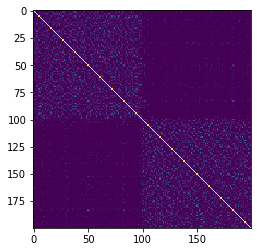

In [217]:
#Store the ouput of USPORF which is a similarity matrix and plot 
sim_mat = clf.transform()
print(sim_mat)
plt.imshow(sim_mat)

In [218]:
#According to the previous run experiments, we found that the similarity matrix isn't truely symmetric 
#Utilize the grapsy function to make it symmetric 
def symmetrize(graph, method="avg"):

    if method == "triu":
        graph = np.triu(graph)
    elif method == "tril":
        graph = np.tril(graph)
    elif method == "avg":
        graph = (np.triu(graph) + np.tril(graph)) / 2
    else:
        msg = "You have not passed a valid parameter for the method."
        raise ValueError(msg)
    # A = A + A' - diag(A)
    graph = graph + graph.T - np.diag(np.diag(graph))
    return graph

[[1.    0.125 0.14  ... 0.02  0.005 0.   ]
 [0.125 1.    0.33  ... 0.01  0.005 0.   ]
 [0.14  0.33  1.    ... 0.01  0.005 0.005]
 ...
 [0.02  0.01  0.01  ... 1.    0.115 0.005]
 [0.005 0.005 0.005 ... 0.115 1.    0.03 ]
 [0.    0.    0.005 ... 0.005 0.03  1.   ]]


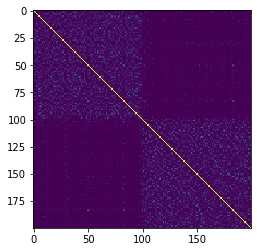

In [219]:
#New similarity matrix after making it symmetric
new_sim = symmetrize(sim_mat)
print(new_sim)
plt.imshow(new_sim)

[[0.    0.875 0.86  ... 0.98  0.995 1.   ]
 [0.875 0.    0.67  ... 0.99  0.995 1.   ]
 [0.86  0.67  0.    ... 0.99  0.995 0.995]
 ...
 [0.98  0.99  0.99  ... 0.    0.885 0.995]
 [0.995 0.995 0.995 ... 0.885 0.    0.97 ]
 [1.    1.    0.995 ... 0.995 0.97  0.   ]]


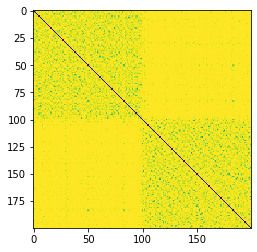

In [220]:
#Create a dissimilarity matrix by 1-new_sim
diss_mat = 1 - new_sim
print(diss_mat)
plt.imshow(diss_mat)

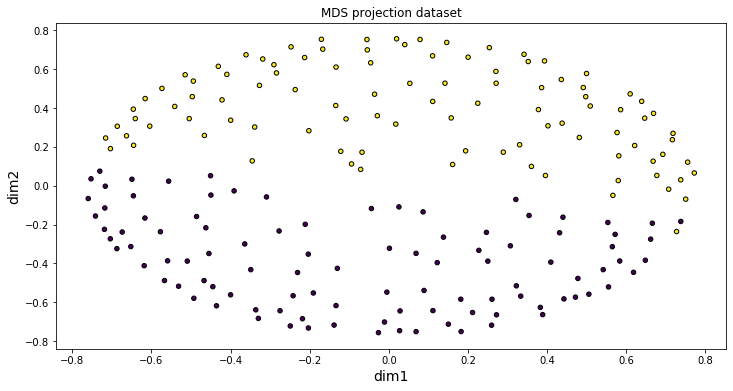

In [223]:
#MDS for the output of USPORF's dissilimilarity matrix
mds_usporf = MDS(n_components=2, metric = True, dissimilarity='precomputed', random_state=1)

embed_usporf = mds_usporf.fit_transform(diss_mat)
plt.figure(figsize=(12,6)) 

plt.scatter(embed_usporf[:, 0], embed_usporf[:, 1], s = 20, c = X_df['y'], edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)

plt.title("MDS projection dataset")
plt.show()

In [224]:
#check if the clusters are identified using the agglomerative clustering 
clust_usporf = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
pred = clust_usporf.fit_predict(embed_usporf)
sc = adjusted_rand_score(Y, pred)

print("True Labels \n", Y)
print("Predicted labels \n", pred)
print("Adjusted rand score \n", sc)

True Labels 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted labels 
 [1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Adjusted rand score 
 0.5909350493147738


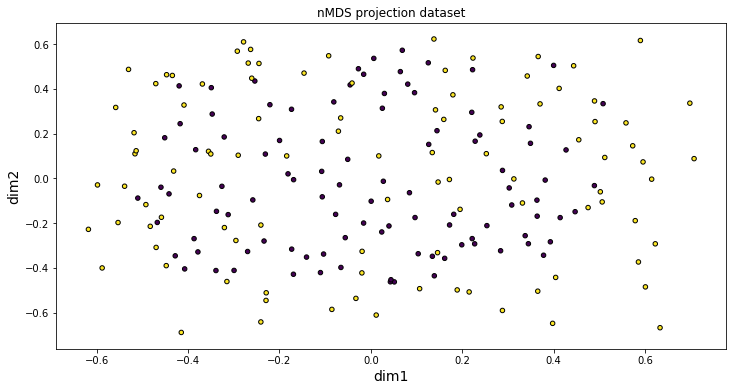

In [225]:
nmds_usporf = MDS(n_components=2, metric = False, dissimilarity='precomputed', random_state=1)

embed_nmds = nmds_usporf.fit_transform(diss_mat)
plt.figure(figsize=(12,6)) 

plt.scatter(embed_nmds[:, 0], embed_nmds[:, 1], s = 20, c = X_df['y'], edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)

plt.title("nMDS projection dataset")
plt.show()

In [226]:
#check if the clusters are identified using the agglomerative clustering 
clust_nmds = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
pred_nmds = clust_nmds.fit_predict(embed_nmds)
sc_nmds = adjusted_rand_score(Y, pred_nmds)

print("True Labels \n", Y)
print("Predicted labels \n", pred_nmds)
print("Adjusted rand score \n", sc_nmds)

True Labels 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted labels 
 [0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1
 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1
 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1
 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0
 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0
 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0]
Adjusted rand score 
 -0.0024239669734499665
